<a href="https://colab.research.google.com/github/Henry-Medeiros/programming-challenge-3-jerichosu/blob/main/Programming_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-11-23 21:41:52--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159777 (156K) [image/jpeg]
Saving to: ‘organisms.jpg.15’

organisms.jpg.15    100%[===================>] 156.03K  --.-KB/s    in 0.01s   

2020-11-23 21:41:52 (14.4 MB/s) - ‘organisms.jpg.15’ saved [159777/159777]



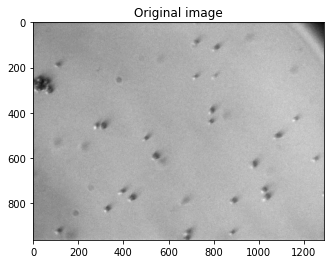

In [82]:
# Programming Challenge #3
# JIAYI (JERRY) SU




# The image below corresponds to a snapshot of single cell organisms observed with a microscope
import cv2
import matplotlib.pyplot as plt
import numpy as np

!wget "https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg"
img = cv2.imread('organisms.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, 0)

# visualization only
plt.imshow(img, 'gray')
plt.title('Original image')
plt.show()

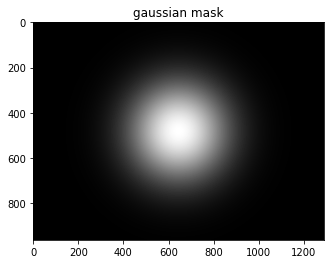

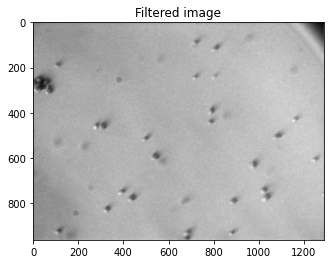

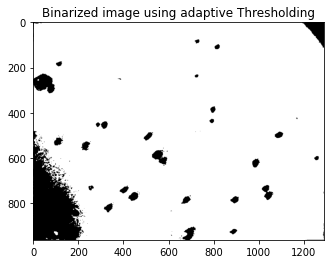

[[131.49050438 135.18308041]
 [142.51719264 143.33053429]]


In [83]:
# Binarize the image to separate the organisms from the background
# Hint 1: You may need to remove some high-frequency noise from the image 
# before thresholding

# remove noise using gaussian filter:
# gaussian low pass filter
dims = img.shape
d0 = 150 # cut off frequency
x = range(dims[1])
y = range(dims[0])
xx, yy = np.meshgrid(x, y)

# compute the EU distance of the filter 
n = 2
duv = ((xx - dims[1]/2)**2 + (yy - dims[0]/2)**2)**0.5
mask_gauss = np.exp((-duv**2)/(n*d0**2))
plt.title('gaussian mask')
plt.imshow(255.0*mask_gauss,'gray')
plt.show()

# convolution
fft_img = np.fft.fft2(img)
gauss_filt_fft_img = mask_gauss*np.fft.fftshift(fft_img)
recon_img = np.fft.ifft2(np.fft.ifftshift(gauss_filt_fft_img))
plt.title('Filtered image')
plt.imshow(abs(recon_img),'gray')
plt.show()

# Hint 2: The background illumination in the image varies significantly, so a 
# single treshold for the entire will not work
img = abs(recon_img)

# Adaptive threshold 
from skimage.filters.thresholding import threshold_otsu

M,N = img.shape
Nx = 2
Ny = 2
I = M//Nx # Floor division
J = N//Ny

thr = np.zeros((Nx, Ny))
img_thr = np.zeros((M,N), dtype = np.uint8)

for i in range(Nx):
  for j in range(Ny):
    sub_img = img[i*I:(i+1)*I, j*J:(j+1)*J]  # segment the image into Nx*Ny sub images 
    thr[i,j] = threshold_otsu(np.asarray(sub_img)) # array also works --> find the threshold for each sub image, here otsu's method is used 
    img_thr[i*I:(i+1)*I, j*J:(j+1)*J] = 255*(sub_img > thr[i,j]) # constructed the segmented sub image

plt.title('Binarized image using adaptive Thresholding')
plt.imshow(img_thr, 'gray')
plt.show()

print(thr)

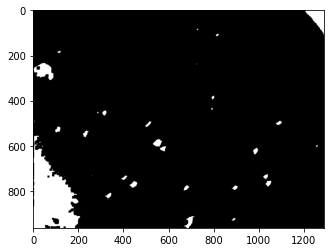

In [84]:
# Locate and plot the organisms present in the image
# Hint 3: You will need to apply a morphological filter to your binarized image 
# to remove spurious pixels left over by the binarization step
# morphological filter to close the objects

# Kernel used for morphological operation
B = np.ones((9,9),np.uint8)
img_thr = 255 - img_thr

# In this problem closing is used, other methods are also tried and comment out

# Dilation 
# img_dilate = cv2.dilate(img_thr,B)
# plt.imshow(img_dilate, 'gray')
# plt.show()

# Erosion
# img_erosion = cv2.erode(img_thr,B)
# plt.imshow(img_erosion, 'gray')
# plt.show()

# Opening 
# opening = cv2.morphologyEx(img_thr, cv2.MORPH_OPEN, B)
# plt.imshow(opening, 'gray')
# plt.show()

# Closing
closing = cv2.morphologyEx(img_thr, cv2.MORPH_CLOSE, B)
plt.imshow(closing, 'gray')
plt.show()

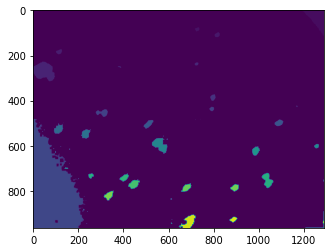

Total number of the organism is 61
area = 354
area = 5309
area = 255
area = 372
area = 410
area = 5778
area = 168
area = 52
area = 470
area = 27
area = 279
area = 1016
area = 66246
area = 2
area = 3
area = 737
area = 856
area = 4
area = 2
area = 1
area = 1143
area = 1
area = 1096
area = 5
area = 6
area = 6
area = 6
area = 2622
area = 13
area = 272
area = 4
area = 906
area = 6
area = 10
area = 16
area = 2
area = 60
area = 1793
area = 340
area = 755
area = 5
area = 4
area = 1255
area = 7
area = 11
area = 1
area = 923
area = 772
area = 974
area = 2
area = 14
area = 1
area = 12
area = 5
area = 3
area = 197
area = 2166
area = 485
area = 2
area = 13
area = 2
Mean area of the organism in pixel is 1610.7704918032787


In [85]:
# Count the the number of organisms present in the image and compute their 
# average area in pixels

# Count the the number of organisms present in the image
from skimage.morphology import label
img_label, num = label(closing, return_num=True)
plt.imshow(img_label)
plt.show()
print('Total number of the organism is {}'.format(num))

# average area in pixels
a = 0
from skimage.measure import regionprops
img_props = regionprops(img_label)
for i in img_props:
  print('area = {}'.format(i.area)) # area in pixels for each organisms
  a = a + i.area

# average area
mean_area = a/num
print('Mean area of the organism in pixel is {}'.format(mean_area))